## IMDB Movie Genre Prediction

**Objectives**

1. Exploratory Data Analysis (EDA): Conduct a thorough EDA on the provided `train_set.xlsx` file to understand the dataset's characteristics and the underlying distribution of data.

2. Machine Learning Model Development: Develop a machine learning model using the training set that predicts the main genres of the movies. We are interested in how you handle the features provided, such as `PLOT_SUMMARY`, `RATING_AVG`, and `BUDGET_AMT`, to name a few.

3. Inference and Submission: Run inferences of the main genres using your model on the `test_set.xlsx` file.

**Data Dictionary**

- **ID**: Movie Id
- **SRC_TITLE_ID**: Maybe a IMDB title id (has duplicated values)*
- **SRC_TITLE_NM**: Movie title name (has duplicated values)*
- **TITLE_TYPE**: Type of the midia (all are equals to movie)
- **TITLE_YR**: Year of the movie
- **RELEASE_DT**: Release date
- **RUN_TIME**: Total time of the movie
- **PLOT_OUTLINE**: Seems to be a shorter summarization of the film 
- **PLOT_MEDIUM**: A more extense summarization of the film
- **PLOT_SUMMARY**: An intermediate summarization of the film (in some cases equals to OUTLINE and MEDIUM) 
- **RATING_AVG**: Average rating of the film (from 0 to 10)
- **NO_OF_VOTES**: Number of votes for the movie
- **BUDGET_AMT**: Budget spent on the movie (Rounded)
- **SRC_GENRE**: Movie genre (target column)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/"

In [2]:
def get_duplicated_values_on_column(df, col):
    df_counts = df[col].value_counts()
    duplicated = list(df_counts[df_counts > 1].index)
    return duplicated

def filter_duplicated_values_on_df(df, col, val_list):
    return df[df[col].isin(val_list)]

def check_for_null_values(df):
    null_values = df.isnull().sum()
    columns_with_null = null_values[null_values > 0]
    print("Columns with null values:")
    print(columns_with_null)

def save_dataframe_indexes(df):
    with open(DATA_PATH + "indexes.txt", "w") as f:
        f.write('\n'.join(map(str, df.index)))

In [3]:
df = pd.read_excel(DATA_PATH + "train_set.xlsx")
df.head(3)

,ID,SRC_TITLE_ID,SRC_TITLE_NM,TITLE_TYPE,TITLE_YR,RELEASE_DT,RUN_TIME,PLOT_OUTLINE,PLOT_MEDIUM,PLOT_SUMMARY,RATING_AVG,NO_OF_VOTES,BUDGET_AMT,SRC_GENRE
0,1,tt7831076,"Yes, Sir! 7",movie,2016,2016-09-02,111.0,NaN,"From 1988 to 2000, Taiwan released six Yes, Si...","From 1988 to 2000, Taiwan released six Yes, Si...",1.4,127,NaN,Comedy
1,2,tt14746344,ReSet,movie,2022,2023-07-02,89.0,A college student passes out at a party and wa...,Danielle is your average college student getti...,A college student passes out at a party and wa...,4.3,71,35000.0,Horror
2,3,tt15670842,The Sword,movie,2021,2021-10-18,106.0,"In the ancient times, the Demon King, who was ...",NaN,"In the ancient times, the Demon King, who was ...",4.7,9,NaN,Action


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            12000 non-null  int64         
 1   SRC_TITLE_ID  12000 non-null  object        
 2   SRC_TITLE_NM  12000 non-null  object        
 3   TITLE_TYPE    12000 non-null  object        
 4   TITLE_YR      12000 non-null  int64         
 5   RELEASE_DT    11919 non-null  datetime64[ns]
 6   RUN_TIME      11218 non-null  float64       
 7   PLOT_OUTLINE  8251 non-null   object        
 8   PLOT_MEDIUM   7640 non-null   object        
 9   PLOT_SUMMARY  11998 non-null  object        
 10  RATING_AVG    12000 non-null  float64       
 11  NO_OF_VOTES   12000 non-null  int64         
 12  BUDGET_AMT    2215 non-null   float64       
 13  SRC_GENRE     12000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 1.3+ MB


In [5]:
check_for_null_values(df)

Columns with null values:
RELEASE_DT        81
RUN_TIME         782
PLOT_OUTLINE    3749
PLOT_MEDIUM     4360
PLOT_SUMMARY       2
BUDGET_AMT      9785
dtype: int64


In [6]:
tests = pd.read_excel(DATA_PATH + "test_set.xlsx")
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            12000 non-null  int64         
 1   SRC_TITLE_ID  12000 non-null  object        
 2   SRC_TITLE_NM  12000 non-null  object        
 3   TITLE_TYPE    12000 non-null  object        
 4   TITLE_YR      12000 non-null  int64         
 5   RELEASE_DT    11929 non-null  datetime64[ns]
 6   RUN_TIME      11263 non-null  float64       
 7   PLOT_OUTLINE  8419 non-null   object        
 8   PLOT_MEDIUM   7521 non-null   object        
 9   PLOT_SUMMARY  12000 non-null  object        
 10  RATING_AVG    12000 non-null  float64       
 11  NO_OF_VOTES   12000 non-null  int64         
 12  BUDGET_AMT    2144 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 1.2+ MB


In [7]:
check_for_null_values(tests)

Columns with null values:
RELEASE_DT        71
RUN_TIME         737
PLOT_OUTLINE    3581
PLOT_MEDIUM     4479
BUDGET_AMT      9856
dtype: int64


In [75]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,12000.0,6000.5,1.0,3000.75,6000.5,9000.25,12000.0,3464.24595
TITLE_YR,12000.0,2014.28025,2001.0,2010.0,2015.0,2019.0,2024.0,5.809678
RELEASE_DT,11919,2014-11-22 04:47:10.707274240,2000-12-31 00:00:00,2010-11-04 12:00:00,2015-08-19 00:00:00,2019-05-30 00:00:00,2024-04-04 00:00:00,NaN
RUN_TIME,11218.0,95.859244,10.0,82.0,92.0,105.0,14400.0,137.131605
RATING_AVG,12000.0,6.265383,0.0,5.4,6.4,7.3,10.0,1.474281
NO_OF_VOTES,12000.0,4511.55075,0.0,23.0,92.0,481.25,1478675.0,34930.58246
BUDGET_AMT,2215.0,6983480.583747,0.0,40000.0,300000.0,2000000.0,250000000.0,22544196.123201


<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Presence of outliers: NO_OF_VOTES, RUN_TIME, BUDGET_AMT, RUN_TIME
- Congruence between TITLE_YR, RELEASE_DT

### EDA

**ID**

In [76]:
df.ID.value_counts()

ID
1        1
8004     1
7995     1
7996     1
7997     1
        ..
4003     1
4004     1
4005     1
4006     1
12000    1
Name: count, Length: 12000, dtype: int64

**SRC_TITLE_ID**

In [77]:
df.SRC_TITLE_ID.value_counts()

SRC_TITLE_ID
tt29674905    2
tt17555674    2
tt7831076     1
tt1289397     1
tt1000020     1
             ..
tt11645028    1
tt6608138     1
tt5523544     1
tt12624668    1
tt2934344     1
Name: count, Length: 11998, dtype: int64

In [78]:
duplicated = get_duplicated_values_on_column(df, "SRC_TITLE_ID")
duplicated

['tt29674905', 'tt17555674']

In [79]:
filter_duplicated_values_on_df(df, "SRC_TITLE_ID", duplicated)

,ID,SRC_TITLE_ID,SRC_TITLE_NM,TITLE_TYPE,TITLE_YR,RELEASE_DT,RUN_TIME,PLOT_OUTLINE,PLOT_MEDIUM,PLOT_SUMMARY,RATING_AVG,NO_OF_VOTES,BUDGET_AMT,SRC_GENRE
3223,3224,tt29674905,Ecce Homo BrÃ¢ncoveanu,movie,2024,2024-02-16,92.0,"In 1714, the wealthiest man in Europe, Wallach...",A historical film that explores the last part ...,"In 1714, the wealthiest man in Europe, Wallach...",7.8,1064,NaN,Drama
3873,3874,tt17555674,El veterano,movie,2022,2022-02-15,101.0,Two friends Julio and Gabriel are carrying out...,NaN,Two friends Julio and Gabriel are carrying out...,4.2,6,NaN,Drama
6687,6688,tt17555674,El veterano,movie,2022,2022-02-15,101.0,Two friends Julio and Gabriel are carrying out...,NaN,Two friends Julio and Gabriel are carrying out...,8.9,48009,NaN,Drama
8966,8967,tt29674905,Ecce Homo BrÃ¢ncoveanu,movie,2024,2024-02-16,92.0,"In 1714, the wealthiest man in Europe, Wallach...",A historical film that explores the last part ...,"In 1714, the wealthiest man in Europe, Wallach...",8.5,151,NaN,Drama


In [80]:
df = df.drop([3873, 8966]) # removing the less voted

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Presence of duplicated SRC_TITLE_ID, removed the less voted

**SRC_TITLE_NM**

In [81]:
df.SRC_TITLE_NM.value_counts()

SRC_TITLE_NM
Broken                5
Waves                 4
Go for Broke          4
Rose                  3
Together              3
                     ..
The Meaning of Tea    1
Caucus                1
Langsuir              1
Click                 1
Plump Revolution      1
Name: count, Length: 11768, dtype: int64

In [82]:
duplicated = get_duplicated_values_on_column(df, "SRC_TITLE_NM")
filter_duplicated_values_on_df(df, "SRC_TITLE_NM", duplicated[0:1])

,ID,SRC_TITLE_ID,SRC_TITLE_NM,TITLE_TYPE,TITLE_YR,RELEASE_DT,RUN_TIME,PLOT_OUTLINE,PLOT_MEDIUM,PLOT_SUMMARY,RATING_AVG,NO_OF_VOTES,BUDGET_AMT,SRC_GENRE
2384,2385,tt3699318,Broken,movie,2014,2014-04-10,122.0,A man becomes a fugitive from the police after...,"Sang-Hyun, who lost his wife, lives with his d...",A man becomes a fugitive from the police after...,6.8,1336,NaN,Action
2728,2729,tt23667006,Broken,movie,2023,2023-03-02,118.0,A true story about unconditional love that sad...,"To the rest of the world, actors Bastiaan and ...",A true story about unconditional love that sad...,6.7,564,NaN,Drama
2935,2936,tt3426866,Broken,movie,2010,2010-03-29,NaN,"Lisa, an emotionally strong and driven woman w...",BROKEN portrays an emotionally strong and driv...,"Lisa, an emotionally strong and driven woman w...",7.4,11,5000.0,Comedy
5116,5117,tt3623634,Broken,movie,2014,2014-04-10,122.0,A man becomes a fugitive from the police after...,"Sang-Hyun, who lost his wife, lives with his d...",A man becomes a fugitive from the police after...,6.8,1336,NaN,Action
11176,11177,tt1207641,Broken,movie,2021,2021-10-19,77.0,NaN,What starts as just another delivery becomes t...,What starts as just another delivery becomes t...,4.7,77,NaN,Crime


In [83]:
len(duplicated)

211

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Besides there is duplicated values, movies can have duplicated names
- Can remove duplicated values using PLOT_OUTLINE

**TITLE_TYPE**

In [84]:
df.TITLE_TYPE.value_counts()

TITLE_TYPE
movie    11998
Name: count, dtype: int64

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- All TITLE_TYPE are the same

**TITLE_YR**

<Axes: >

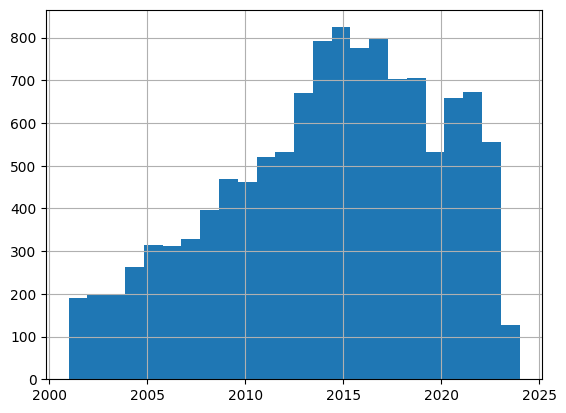

In [85]:
df.TITLE_YR.hist(bins=24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            12000 non-null  int64         
 1   SRC_TITLE_ID  12000 non-null  object        
 2   SRC_TITLE_NM  12000 non-null  object        
 3   TITLE_TYPE    12000 non-null  object        
 4   TITLE_YR      12000 non-null  int64         
 5   RELEASE_DT    11919 non-null  datetime64[ns]
 6   RUN_TIME      11218 non-null  float64       
 7   PLOT_OUTLINE  8251 non-null   object        
 8   PLOT_MEDIUM   7640 non-null   object        
 9   PLOT_SUMMARY  11998 non-null  object        
 10  RATING_AVG    12000 non-null  float64       
 11  NO_OF_VOTES   12000 non-null  int64         
 12  BUDGET_AMT    2215 non-null   float64       
 13  SRC_GENRE     12000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 1.3+ MB


In [12]:
print(len(df[df.TITLE_YR > df.RELEASE_DT.dt.year]))
df[df.TITLE_YR > df.RELEASE_DT.dt.year].head(3)

482


,ID,SRC_TITLE_ID,SRC_TITLE_NM,TITLE_TYPE,TITLE_YR,RELEASE_DT,RUN_TIME,PLOT_OUTLINE,PLOT_MEDIUM,PLOT_SUMMARY,RATING_AVG,NO_OF_VOTES,BUDGET_AMT,SRC_GENRE
30,31,tt4372084,Blood Vow,movie,2018,2015-06-01,94.0,Three friends discover an ancient order of mon...,NaN,Three friends discover an ancient order of mon...,3.9,1409,100000.0,Horror
31,32,tt0424938,Karla,movie,2006,2005-11-25,102.0,"Based on real events, Paul Bernardo and his wi...",True story about a woman who falls in love wit...,"Based on real events, Paul Bernardo and his wi...",5.4,6337,5000000.0,Crime
52,53,tt3730494,Here Lies,movie,2014,2013-03-30,102.0,HERE LIES is a film about film-making and the ...,NaN,HERE LIES is a film about film-making and the ...,8.1,11,NaN,Drama


<span style="color: lightblue; font-size: 14px;">Notes:</span>

- RELEASE_DT with higher value than TITLE_YR. Is this possible?

**RELEASE_DT**

In [86]:
df["RELEASE_YR_MN"] = df.RELEASE_DT.dt.strftime('%Y-%m')
df['RELEASE_YR_MN'] = pd.to_datetime(df['RELEASE_YR_MN'])

<Axes: >

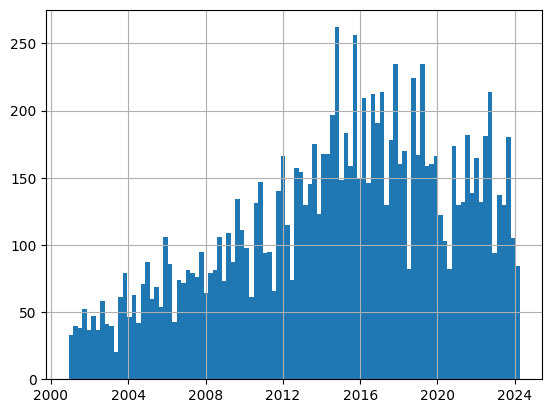

In [87]:
df["RELEASE_YR_MN"].hist(bins=100)

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- RELEASE_DT even distribution and some sazonality

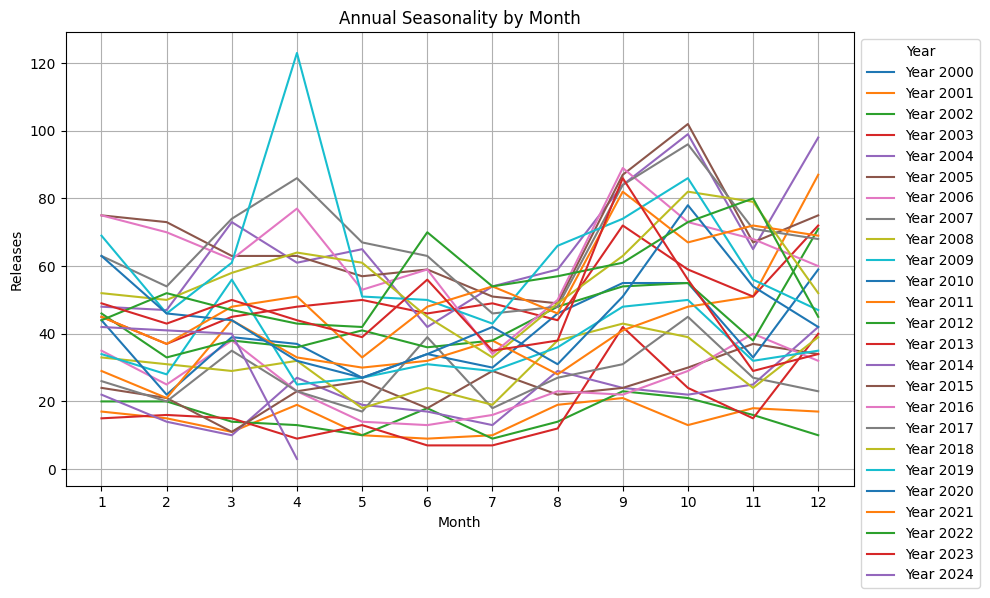

In [88]:
df['RELEASE_YR'] = pd.to_datetime(df['RELEASE_YR_MN']).dt.year
df['RELEASE_MN'] = pd.to_datetime(df['RELEASE_YR_MN']).dt.month

grouped = df.groupby(['RELEASE_YR', 'RELEASE_MN']).size().unstack()

plt.figure(figsize=(10, 6))

# plot each year as a separate line
for year in grouped.index:
    plt.plot(grouped.columns, grouped.loc[year], label=f'Year {int(year)}')

plt.title('Annual Seasonality by Month')
plt.xlabel('Month')
plt.ylabel('Releases')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Just for curiosity, plotting the month sazonality.
- More releases between March-May, September-November and December
- Less releases between June-August

OBS: could also plot a weekday sazonality

**RUN_TIME**

<Axes: >

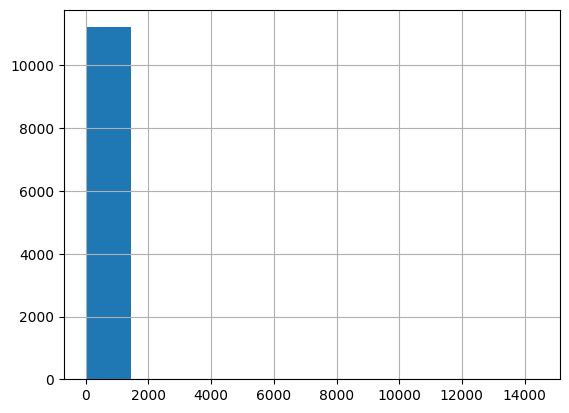

In [89]:
df.RUN_TIME.hist()

In [90]:
df.RUN_TIME.nlargest(15)

5512     14400.0
1900       641.0
2362       380.0
7495       360.0
5519       330.0
11763      321.0
7165       304.0
1515       270.0
7593       270.0
2359       259.0
6112       240.0
1939       235.0
5852       233.0
7646       226.0
94         224.0
Name: RUN_TIME, dtype: float64

<Axes: >

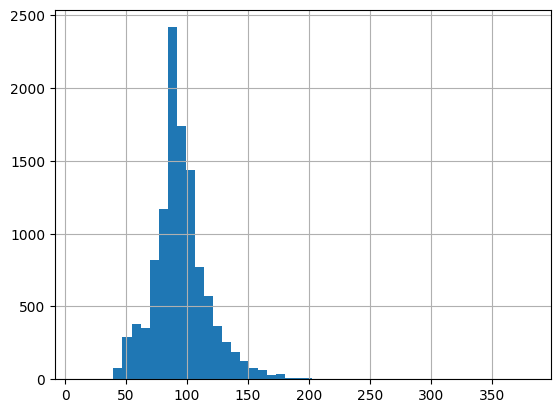

In [91]:
df[df.RUN_TIME < 600].RUN_TIME.hist(bins=50)

**PLOT_OUTLINE, PLOT_MEDIUM, PLOT_SUMMARY**

In [92]:
df.PLOT_OUTLINE[1]

'A college student passes out at a party and wakes in the bedroom of Edgar, who seems nice but has sinister intentions. As she tries to escape, she finds an heirloom that may help her gain the upper hand against her captor.'

In [93]:
df.PLOT_MEDIUM[1]

'Danielle is your average college student getting ready to graduate. At a party she seems to become drunk, passes out and wakes up in the spare bedroom of a man named Edgar. Edgar seems nice but it soon becomes clear that his intentions are anything but benevolent. As she desperately tries to escape she finds that an heirloom may give her an unexpected advantage.'

In [94]:
df.PLOT_SUMMARY[1]

'A college student passes out at a party and wakes in the bedroom of Edgar, who seems nice but has sinister intentions. As she tries to escape, she finds an heirloom that may help her gain the upper hand against her captor.'

In [95]:
(df.PLOT_MEDIUM == df.PLOT_OUTLINE).value_counts()

False    11981
True        17
Name: count, dtype: int64

In [96]:
(df.PLOT_SUMMARY == df.PLOT_OUTLINE).value_counts()

True     8249
False    3749
Name: count, dtype: int64

In [97]:
(df.PLOT_SUMMARY == df.PLOT_MEDIUM).value_counts()

False    8234
True     3764
Name: count, dtype: int64

In [98]:
((df.PLOT_SUMMARY == df.PLOT_MEDIUM) & (df.PLOT_SUMMARY == df.PLOT_OUTLINE)).value_counts()

False    11981
True        17
Name: count, dtype: int64

In [99]:
df['PLOT_OUTLINE'].dropna().apply(len).mean() # avg outlier len

157.9146563219784

In [100]:
df['PLOT_MEDIUM'].dropna().apply(len).mean()

588.9530043199371

In [101]:
df['PLOT_SUMMARY'].dropna().apply(len).mean()

281.9845781927309

In [102]:
df.PLOT_OUTLINE.value_counts()

PLOT_OUTLINE
Over 8 years, a small fisherman puts himself, as 'David against Goliath', in the heart of the new reform of the Common Fisheries in Brussels, to try to understand and change the system that took everything from him.           2
In the weeks before the 2016 general election, Oscar-winning filmmaker Michael Moore performs a pro-Hillary Clinton stand-up show deep in the heart of TrumpLand.                                                                 2
Away from home, a group of young people survive without job and stable residence. The passage of time is transforming them. Immersed in constant scape and full of energy, they suddenly will face a fact that will test them.    2
After his girlfriend cheats on him, Nico decides to reunite with his one true love: The Cinema. He puts together a team of college buddies and sets out on a low budget film adventure.                                           2
'Four men with nowhere to go and everything to lose are about to have the w

In [103]:
df.drop_duplicates(subset=['PLOT_SUMMARY', 'PLOT_OUTLINE', 'PLOT_MEDIUM'], keep='first', inplace=True)
df = df.drop([632]) # SUMMARY, MEDIUM, OUTLINE null

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- PLOT_OUTLINE seems to be a shorter summarization of the film 
- PLOT_MEDIUM seems to be a more extense summarization of the film
- PLOT_SUMMARY seems to be the traditional summarization of the film (in some cases equals to OUTLINE and/or MEDIUM)
- Intersections between PLOTS_*

In [104]:
df

,ID,SRC_TITLE_ID,SRC_TITLE_NM,TITLE_TYPE,TITLE_YR,RELEASE_DT,RUN_TIME,PLOT_OUTLINE,PLOT_MEDIUM,PLOT_SUMMARY,RATING_AVG,NO_OF_VOTES,BUDGET_AMT,SRC_GENRE,RELEASE_YR_MN,RELEASE_YR,RELEASE_MN
0,1,tt7831076,"Yes, Sir! 7",movie,2016,2016-09-02,111.0,NaN,"From 1988 to 2000, Taiwan released six Yes, Si...","From 1988 to 2000, Taiwan released six Yes, Si...",1.4,127,NaN,Comedy,2016-09-01,2016.0,9.0
1,2,tt14746344,ReSet,movie,2022,2023-07-02,89.0,A college student passes out at a party and wa...,Danielle is your average college student getti...,A college student passes out at a party and wa...,4.3,71,35000.0,Horror,2023-07-01,2023.0,7.0
2,3,tt15670842,The Sword,movie,2021,2021-10-18,106.0,"In the ancient times, the Demon King, who was ...",NaN,"In the ancient times, the Demon King, who was ...",4.7,9,NaN,Action,2021-10-01,2021.0,10.0
3,4,tt14833900,Around the Table,movie,2021,2021-05-13,104.0,NaN,Haruko is a single mother. She has an unusual ...,Haruko is a single mother. She has an unusual ...,6.0,92,NaN,Drama,2021-05-01,2021.0,5.0
4,5,tt10495074,Iqro: My Universe,movie,2019,2019-07-11,101.0,NaN,"Aqilla has aspirations to become an astronaut,...","Aqilla has aspirations to become an astronaut,...",6.8,16,NaN,Adventure,2019-07-01,2019.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,tt28504359,Okkaroju... 48 Hours,movie,2023,2023-07-29,121.0,Okka Roju is a Telugu movie starring Aaditya R...,NaN,Okka Roju is a Telugu movie starring Aaditya R...,8.8,1070,NaN,Drama,2023-07-01,2023.0,7.0
11996,11997,tt4885814,Who in the Pool,movie,2015,2015-07-31,90.0,7 friend got invited in a swimming pool engage...,"A friend of the dead, let Kocho has been self-...",7 friend got invited in a swimming pool engage...,3.3,50,NaN,Horror,2015-07-01,2015.0,7.0
11997,11998,tt15528116,The Timekeepers of Eternity,movie,2021,2021-09-23,64.0,Mr Toomey obsessively tears paper to control h...,A classic Stephen King miniseries is re-envisi...,Mr Toomey obsessively tears paper to control h...,6.9,294,NaN,Animation,2021-09-01,2021.0,9.0
11998,11999,tt1355568,Generation RX,movie,2008,2008-11-11,81.0,An eye-opening documentary dealing with the co...,"For decades, scores of doctors, government off...",An eye-opening documentary dealing with the co...,7.2,236,NaN,Documentary,2008-11-01,2008.0,11.0


**RATING_AVG**

<Axes: >

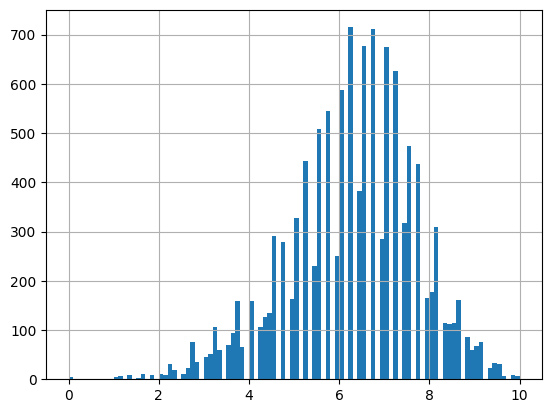

In [105]:
df.RATING_AVG.hist(bins=100)

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- RATING_AVG normal distribution

**NO_OF_VOTES**

<Axes: >

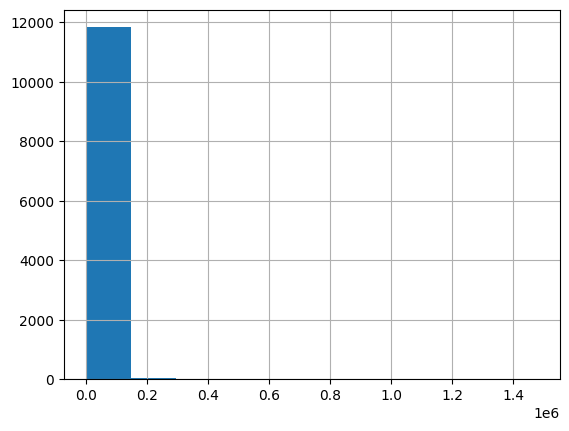

In [106]:
df.NO_OF_VOTES.hist()

In [107]:
df.NO_OF_VOTES.nlargest(15)

9986     1478675
7657      857032
4737      835550
9968      771553
6204      721181
9339      708244
7616      669671
7813      631616
4279      612344
3951      609278
6330      608892
3738      603777
1445      553631
586       552290
10246     534439
Name: NO_OF_VOTES, dtype: int64

In [108]:
df.NO_OF_VOTES.nsmallest(15)

64      0
2341    0
3153    0
8962    0
141     5
286     5
372     5
402     5
459     5
499     5
511     5
611     5
639     5
778     5
799     5
Name: NO_OF_VOTES, dtype: int64

<Axes: >

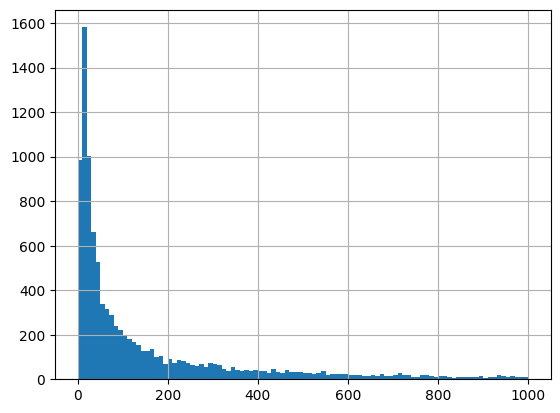

In [18]:
df.NO_OF_VOTES.hist(bins=100, range=(0, 1000))

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- NO_OF_VOTES positive skewed

<Axes: >

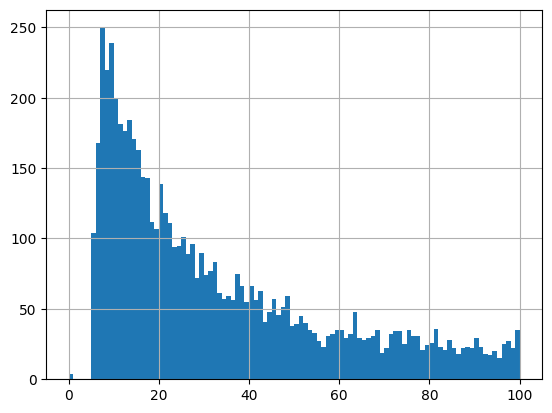

In [19]:
df.NO_OF_VOTES.hist(bins=100, range=(0, 100))

**BUDGET_AMT**

<Axes: >

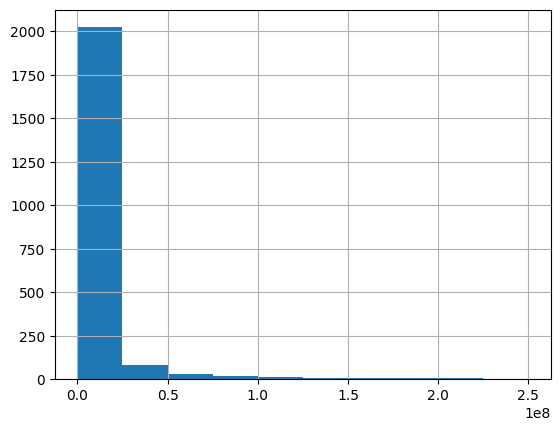

In [111]:
df.BUDGET_AMT.hist()

In [112]:
df.BUDGET_AMT.nlargest(15)

6172    250000000.0
2070    217000000.0
2034    200000000.0
4737    200000000.0
8799    200000000.0
580     176000000.0
4279    175000000.0
6204    175000000.0
8361    175000000.0
9422    175000000.0
622     170000000.0
6042    170000000.0
2157    165000000.0
3951    160000000.0
4168    150000000.0
Name: BUDGET_AMT, dtype: float64

In [113]:
df.BUDGET_AMT.nsmallest(15)

403      0.0
2062     0.0
2253     0.0
2752     0.0
2997     0.0
3542     0.0
5265     0.0
5559     0.0
5864     0.0
6008     0.0
6119     0.0
6274     0.0
9651     0.0
10044    0.0
10598    0.0
Name: BUDGET_AMT, dtype: float64

<Axes: >

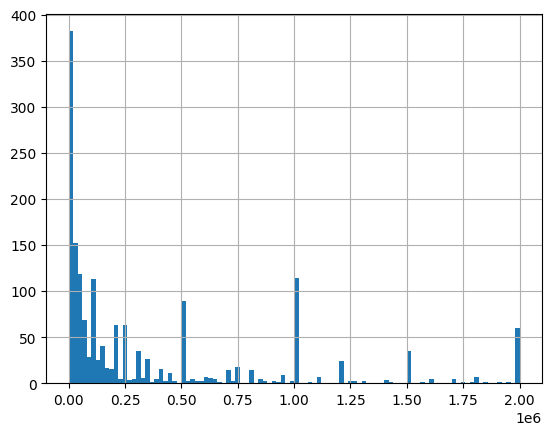

In [114]:
df.BUDGET_AMT.hist(bins=100, range=(0, 2000000))

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- BUDGET_AMT positive skewed

**SRC_GENRE**

In [115]:
genre = df.SRC_GENRE.value_counts()
genre

SRC_GENRE
Drama          3108
Documentary    2804
Comedy         2264
Action         1115
Horror          692
Crime           437
Adventure       282
Animation       251
Thriller        248
Biography       189
Romance         130
Family           96
Mystery          73
Fantasy          61
Sci-Fi           60
Music            33
Musical          24
Western          16
History          13
Sport             9
War               7
Adult             5
Short             1
Name: count, dtype: int64

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- SRC_GENRE are highly unbalanced

<Axes: xlabel='SRC_GENRE'>

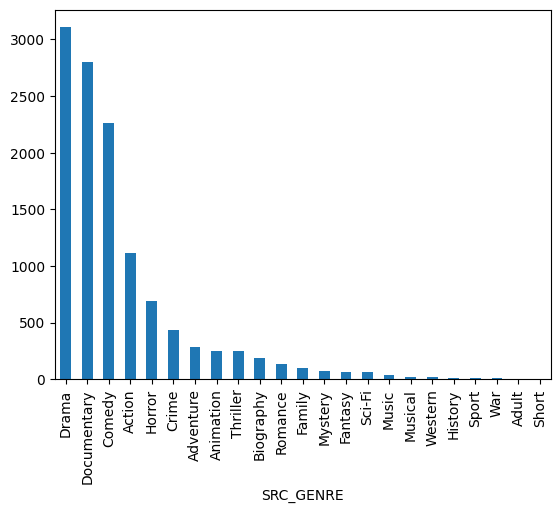

In [116]:
genre.plot.bar(x="index", y="values")

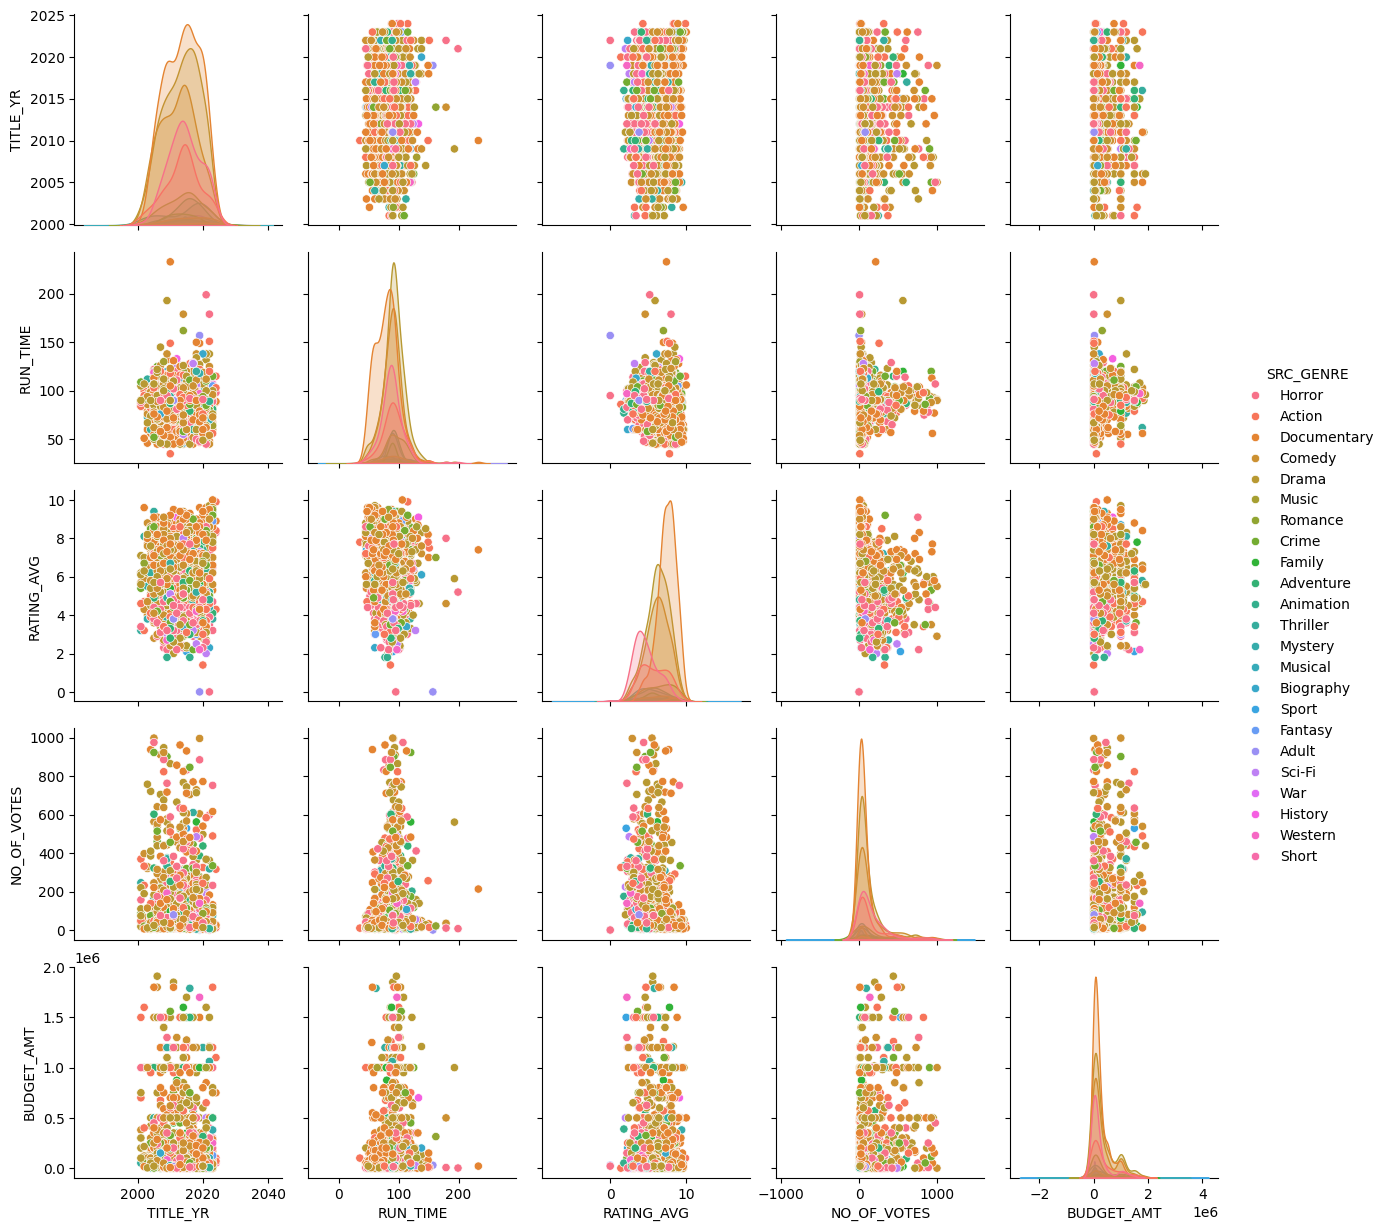

In [22]:
_ = df[(df.RUN_TIME < 600) & (df.BUDGET_AMT < 2000000) & (df.NO_OF_VOTES < 1000)] # remove outliers

sns.pairplot(_.drop(columns=["ID"]), hue="SRC_GENRE")

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Created this plot to see if there is some difference between the distribution of the classes and to identify the best variables that can help understanding the movie genre
- RATING_AVG, RUN_TIME have shifted distributions between the movies genres, this can help predicting future values
- TITLE_YR, RELEASE_YR, RELEASE_MN, BUDGET_AMOUNT distributions doesn't seems to differ between the genres, but maybe have a indirect relation with the target column (combined with other variables)

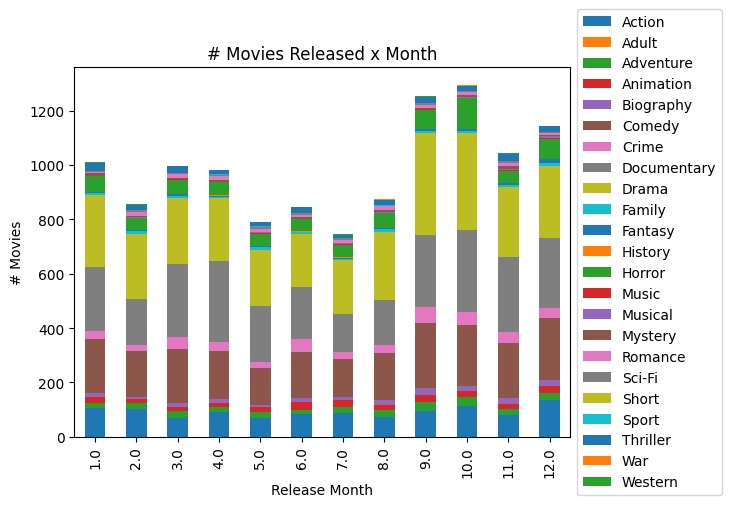

In [118]:
grouped = df.groupby(['RELEASE_MN', 'SRC_GENRE']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Release Month')
plt.ylabel('# Movies')
plt.title('# Movies Released x Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Same view as before, but instead of spliting by year, now it's by genre and in bar graph. There is no high difference between the # of movies on each genre between the months, they seems even on this graph

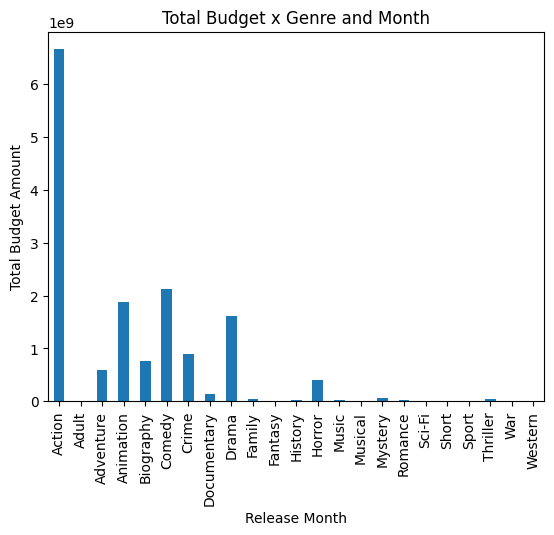

In [119]:
grouped = df.groupby('SRC_GENRE')['BUDGET_AMT'].sum()
grouped.plot(kind='bar')
plt.xlabel('Release Month')
plt.ylabel('Total Budget Amount')
plt.title('Total Budget x Genre and Month')

plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Difference of budget between movies genres on absolute value. 
- Action is the genre that spends the most money, followed by Animation, Comedy and Drama.

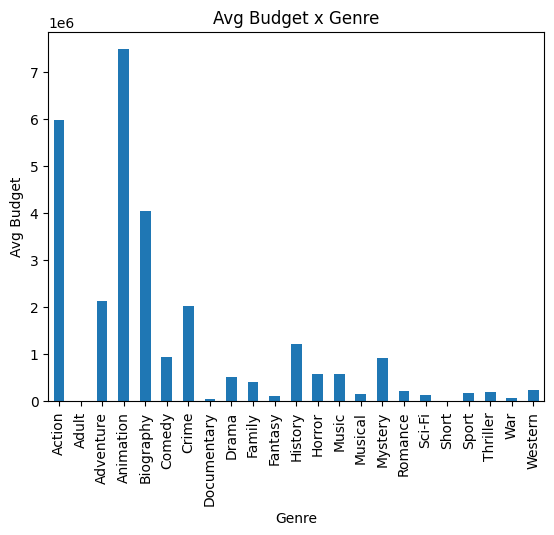

In [120]:
grouped = df.groupby('SRC_GENRE').agg({'BUDGET_AMT': 'sum', 'SRC_GENRE': 'count'})
grouped['AVERAGE_BUDGET_PER_GENRE'] = grouped['BUDGET_AMT'] / grouped['SRC_GENRE']
grouped['AVERAGE_BUDGET_PER_GENRE'].plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Avg Budget')
plt.title('Avg Budget x Genre')

plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Because there is a lot of unbalance on the genre, I also plotted the difference of budget between movies genres on relative value. 
- Animation is the most expensive genre, followed by Action, Bioagraphy and Adventure.

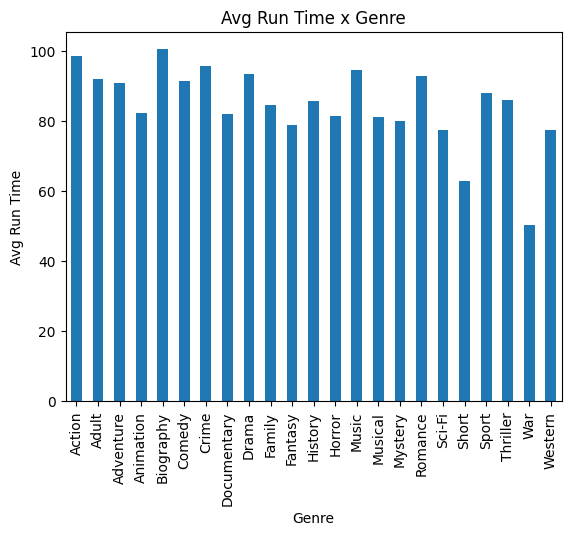

In [121]:
grouped = df.groupby('SRC_GENRE').agg({'RUN_TIME': 'sum', 'SRC_GENRE': 'count'})
grouped['AVERAGE_RUN_TIME_PER_GENRE'] = grouped['RUN_TIME'] / grouped['SRC_GENRE']
grouped['AVERAGE_RUN_TIME_PER_GENRE'].plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Avg Run Time')
plt.title('Avg Run Time x Genre')

plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Some genres, like War and Short (as expected), have a smaller runtime.

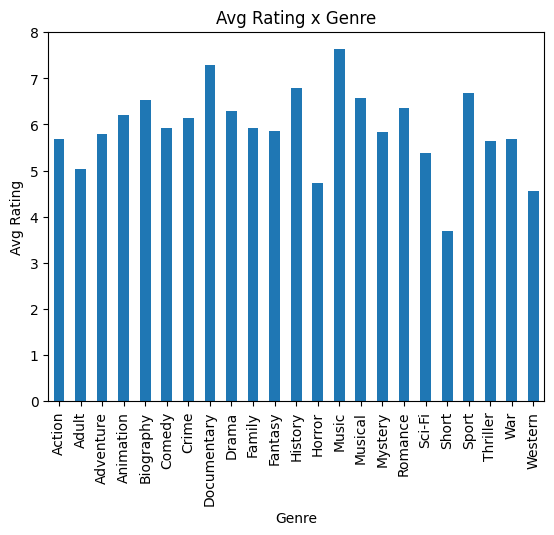

In [122]:
grouped = df.groupby('SRC_GENRE').agg({'RATING_AVG': 'sum', 'SRC_GENRE': 'count'})
grouped['AVERAGE_PER_GENRE'] = grouped['RATING_AVG'] / grouped['SRC_GENRE']
grouped['AVERAGE_PER_GENRE'].plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Avg Rating')
plt.title('Avg Rating x Genre')

plt.show()

<span style="color: lightblue; font-size: 14px;">Notes:</span>

- Rating also differ a lot between the movie genres

In [123]:
save_dataframe_indexes(df)